In [8]:
# import required Biophython functions 
from Bio import Entrez
from Bio import SeqIO

# distant globin accession numbers
globinAccessions = ['NP_000509','NP_005359','NP_067080','NP_001049476','NP_001235928']

# set email address for NCBI
Entrez.email = 'adinanadeem@gmail.com'

# fetch the sequences from NCBI
handle = Entrez.efetch(db="protein", id=globinAccessions, rettype="gb", retmode="text")
records = SeqIO.parse(handle, "gb")

# # print out the sequence names
# for record in records:
#     print(record.name)

# write to fasta file
SeqIO.write(records, "globins.fa", "fasta")

5

In [9]:
from Bio import AlignIO
# module to allow command line calls
import os

# run Muscle MSA
cmdLine = 'muscle -align globins.fa -output distant_globins.aln'
os.popen(cmdLine)



In [11]:
# read in the MUSCLE alignment
alignment = AlignIO.read('distant_globins.aln','fasta')

In [12]:
from Bio.Phylo.Applications import RaxmlCommandline

# convert the alignment to phylip format
AlignIO.write(alignment, 'distant_globins.phy', 'phylip-relaxed')

# set the working directory
current_dir = os.getcwd()
working_dir = current_dir+'/raxml/'
print(working_dir)

# NB RAxML will not overwrite existing files, so delete the old info file and it will create a new one
if os.path.exists(working_dir+'RAxML_info.*'):
    os.remove(working_dir+'RAxML_info.*')

# set up the RaxML commandline call
raxml_cline = RaxmlCommandline(sequences='distant_globins.phy', model="PROTCATWAG", name="distant_globins", working_dir=working_dir)

#run raxml
raxml_cline()

c:\Users\Lenovo\Desktop\globin_phylogeny_raxml/raxml/


('\n\nThis is RAxML version 7.2.6 released by Alexandros Stamatakis in February 2010.\n\nWith greatly appreciated code contributions by:\nAndre Aberer (TUM)\nSimon Berger (TUM)\nJohn Cazes (TACC)\nMichael Ott (TUM)\nNick Pattengale (UNM)\nWayne Pfeiffer (SDSC)\n\n\nAlignment has 164 distinct alignment patterns\n\nProportion of gaps and completely undetermined characters in this alignment: 11.91%\n\nRAxML rapid hill-climbing mode\n\nUsing 1 distinct models/data partitions with joint branch length optimization\n\n\nExecuting 1 inferences on the original alignment using 1 distinct randomized MP trees\n\nAll free model parameters will be estimated by RAxML\nML estimate of 25 per site rate categories\n\nLikelihood of final tree will be evaluated and optimized under GAMMA\n\nGAMMA Model parameters will be estimated up to an accuracy of 0.1000000000 Log Likelihood units\n\nPartition: 0\nAlignment Patterns: 164\nName: No Name Provided\nDataType: AA\nSubstitution Matrix: WAG\nFixed Base Frequen

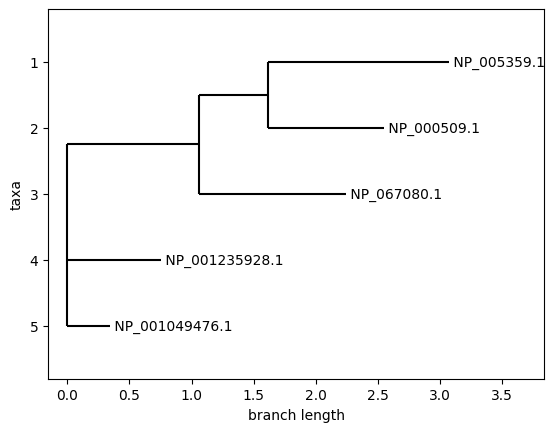

In [ ]:
# read in the resulting tree
tree = Phylo.read(working_dir+'/RAxML_result.distant_globins','newick')

# plot the tree
Phylo.draw(tree)

- Sequences NP_005359.1 and NP_000509.1 appear closely related due to their short branch length (0.56048).
- This group clusters with NP_067080.1 (branch length 1.0588), suggesting a more distant relationship but sharing a closer ancestor compared to other sequences.
- NP_001235928.1 seems somewhat more divergent (branch length 0.7535) from the previous cluster.
- NP_001049476.1 exhibits the largest branch length (0.3411), suggesting the most distant evolutionary relationship among the sequences.